<b>ПИ19-3 Деменчук<br>
ML2.2 Классификация изображений</b>

Импортируем необходимые библиотеки для работы

In [1]:
#Больше библиотек Богу библиотек!
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
import time

from PIL import Image as PImage


import cv2

ModuleNotFoundError: No module named 'cv2'

In [29]:
df = pd.read_csv("./anno.csv", sep=";")
df

,Image,x1,y1,x2,y2,class,test
0,000001.jpg,112,7,853,717,1,0
1,000002.jpg,48,24,441,202,1,0
2,000003.jpg,7,4,277,180,1,0
3,000004.jpg,33,50,197,150,1,0
4,000005.jpg,5,8,83,58,1,0
...,...,...,...,...,...,...,...
16180,016181.jpg,38,36,375,234,196,1
16181,016182.jpg,29,34,235,164,196,1
16182,016183.jpg,25,32,587,359,196,1
16183,016184.jpg,56,60,208,186,196,1


In [30]:
files_list = df["Image"].to_list()

Выводим инфу о количественных параметрах датасета

In [31]:
len(files_list)

16185

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Загрузка и подготовка данных

In [29]:
row_number, column_number = 64, 64

In [ ]:
# Сама работа с изображениями

### 1. Переводим все изображения в формат матрицы

In [33]:
def patchfix(path: str) -> str:
     return f"./car_ims/{path}"

In [34]:
def show_img(index=0):
    plt.imshow(cv2.imread(patchfix(files_list[index]), cv2.IMREAD_UNCHANGED))

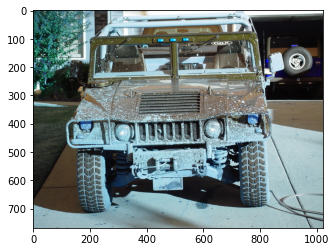

In [35]:
show_img()

### 2. Уменьшаем размеры

100/16185
200/16185
300/16185
400/16185
500/16185
600/16185
700/16185
800/16185
900/16185
1000/16185
1100/16185
1200/16185
1300/16185
1400/16185
1500/16185
1600/16185
1700/16185
1800/16185
1900/16185
2000/16185
2100/16185
2200/16185
2300/16185
2400/16185
2500/16185
2600/16185
2700/16185
2800/16185
2900/16185
3000/16185
3100/16185
3200/16185
3300/16185
3400/16185
3500/16185
3600/16185
3700/16185
3800/16185
3900/16185
4000/16185
4100/16185
4200/16185
4300/16185
4400/16185
4500/16185
4600/16185
4700/16185
4800/16185
4900/16185
5000/16185
5100/16185
5200/16185
5300/16185
5400/16185
5500/16185
5600/16185
5700/16185
5800/16185
5900/16185
6000/16185
6100/16185
6200/16185
6300/16185
6400/16185
6500/16185
6600/16185
6700/16185
6800/16185
6900/16185
7000/16185
7100/16185
7200/16185
7300/16185
7400/16185
7500/16185
7600/16185
7700/16185
7800/16185
7900/16185
8000/16185
8100/16185
8200/16185
8300/16185
8400/16185
8500/16185
8600/16185
8700/16185
8800/16185
8900/16185
9000/16185
9100/16185
9200/161

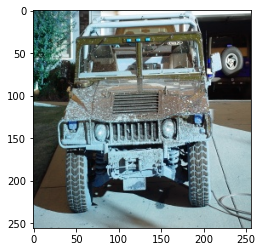

In [36]:
files_len = len(files_list)
counter = 1
for file in files_list:
    img = cv2.imread(patchfix(file), cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(img, (row_number, column_number), interpolation = cv2.INTER_AREA)
    cv2.imwrite(patchfix(file), resized) 
    
    if counter % 100 == 0:
        print(f"{counter}/{files_len}")

    counter += 1
    
show_img()

### 3. Переводим в черно-белый формат

In [37]:
def grayscale(picture):
    """Gray Scale Image"""
    res= PImage.new(picture.mode, picture.size)
    width, height = picture.size

    for i in range(0, width):
        for j in range(0, height):
            pixel=picture.getpixel((i,j))
            avg=(pixel[0]+pixel[1]+pixel[2])/3
            res.putpixel((i,j),(int(avg),int(avg),int(avg)))
    
    return res

(256, 256, 3)


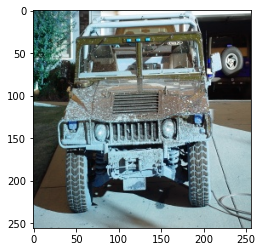

In [38]:
counter = 1
for file in files_list:
    img = cv2.imread(patchfix(file),cv2.IMREAD_UNCHANGED)
    print(img.shape)
    break
    
    if counter % 100 == 0:
        print(f"{counter}/{files_len}")
    
    counter += 1
    
show_img()

### 4. Нормализация изображения

In [39]:
IMAGES_DATA = []
IMAGES_DATA

[]

In [40]:

files_len = len(files_list)
for file in files_list:
    
    image = PImage.open(patchfix(file)).convert('RGB')
    image = np.array(image)
    if image is None or image.shape != (row_number, column_number, 3):
        print(f'This image is bad: {myFile} {image.shape if image is not None else "None"}')
    else:
        IMAGES_DATA.append(image)

In [41]:
IMAGES_DATA = np.array(IMAGES_DATA)

In [42]:
X = IMAGES_DATA

Y = df["class"].to_numpy()

Делим данные на тестовую и обучающую выборки

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [22]:
# Реализация SVC
from sklearn import svm

start_time = time.time()
nb = svm.SVC().fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

ValueError: Found array with dim 4. Estimator expected <= 2.

In [22]:
#Реализация наивного байесовского метода
from sklearn.naive_bayes import MultinomialNB

start_time = time.time()
nb = MultinomialNB().fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           1       0.04      0.07      0.05        44
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00        40
           6       0.00      0.00      0.00        44
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00        45
           9       0.00      0.00      0.00        41
          10       0.03      0.03      0.03        33
          11       0.00      0.00      0.00        38
          12       0.14      0.03      0.05        36
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        42
          15       0.00      0.00      0.00        43
          16       0.00      0.00      0.00        43
          17       0.00      0.00      0.00        40
          18       0.00    

/opt/homebrew/lib/python3.9/site-packages/scikit_learn-1.1.dev0-py3.9-macosx-11-arm64.egg/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/scikit_learn-1.1.dev0-py3.9-macosx-11-arm64.egg/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/scikit_learn-1.1.dev0-py3.9-macosx-11-arm64.egg/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [23]:
# Реализация метода k-ближайших соседей
import sklearn.neighbors as neigh

start_time = time.time()
kn = neigh.KNeighborsClassifier(n_neighbors=90, n_jobs=6).fit(X_train,y_train)
y_pred = kn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00        32
           3       0.02      0.05      0.02        43
           4       0.02      0.17      0.04        42
           5       0.00      0.00      0.00        40
           6       0.00      0.00      0.00        44
           7       0.01      0.03      0.01        39
           8       0.00      0.00      0.00        45
           9       0.00      0.00      0.00        41
          10       0.00      0.00      0.00        33
          11       0.00      0.00      0.00        38
          12       0.00      0.00      0.00        36
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        42
          15       0.00      0.00      0.00        43
          16       0.00      0.00      0.00        43
          17       0.00      0.00      0.00        40
          18       0.00    

/opt/homebrew/lib/python3.9/site-packages/scikit_learn-1.1.dev0-py3.9-macosx-11-arm64.egg/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/scikit_learn-1.1.dev0-py3.9-macosx-11-arm64.egg/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/scikit_learn-1.1.dev0-py3.9-macosx-11-arm64.egg/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [ ]:
# Реализация метода опорных векторов SVM

start_time = time.time()
import sklearn.svm as svm
svect = svm.LinearSVC(max_iter=5000).fit(X_train, y_train)
y_pred = svect.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

In [ ]:
# Реализация логистической регресси
from sklearn.linear_model import LogisticRegression

start_time = time.time()
logr = LogisticRegression(max_iter=500, n_jobs=6).fit(X_train, y_train)
y_pred = logr.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Реализация метода случайного леса RandomForest
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
max_depth = [1,5,10,50]
n_estimators = [5,10,100,500]
grid_params ={'max_depth':max_depth,'n_estimators':n_estimators}
rf = GridSearchCV(RandomForestClassifier(class_weight = 'balanced'), grid_params,
                  scoring = 'accuracy', cv=10,n_jobs=6, return_train_score=True)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

In [ ]:
# Реализация линейного классификатора с SGD-обучением 

from sklearn.linear_model import SGDClassifier
alpha = [10**x for x in range(-4,4)]
penalty = ["l1","l2"]
grid_params ={'alpha':alpha,'penalty':penalty}
alpha_log = [math.log(x,10) for x in grid_params["alpha"]]

sgd = GridSearchCV(SGDClassifier(class_weight= 'balanced'), grid_params,
                     scoring = 'accuracy', cv=10,n_jobs=6, return_train_score=True)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
start_time = time.time()

print("Время выполнения", (time.time()-start_time))

In [ ]:
# Реализация метода градиентного бустинга XGBoosted
from xgboost import XGBClassifier
start_time = time.time()
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=6, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

# keras

Build simple artificial neural network for image classification

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [4]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

2022-04-04 13:39:32.259800: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-04 13:39:32.260578: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Epoch 1/5


2022-04-04 13:39:32.828540: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-04 13:39:32.923948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 18s 11ms/step - loss: nan - accuracy: 0.0998
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 16s 10ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: nan - accuracy: 0.1000


In [5]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

2022-04-04 13:40:57.428262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/Users/demg/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/demg/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/demg/miniforge3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# CNN

In [45]:
cnn = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(196, activation='softmax')
])

In [46]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
cnn.fit(X_train, y_train, epochs=10)

KeyboardInterrupt: 

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    
    axes[0].set_xlabel("Тренировочные примеры")
    axes[0].set_ylabel("Оценка")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes,return_times=True,)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="r",)
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Тренировочная оценка")
    axes[0].plot(train_sizes, test_scores_mean, "o-", color="g", label="Оценка кросс-валидации")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(train_sizes,fit_times_mean - fit_times_std,fit_times_mean + fit_times_std,alpha=0.1,)
    axes[1].set_xlabel("Тренировочные данные")
    axes[1].set_ylabel("Успешность")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(fit_time_sorted,test_scores_mean_sorted - test_scores_std_sorted,test_scores_mean_sorted + test_scores_std_sorted,alpha=0.1,)
    axes[2].set_xlabel("Успешность")
    axes[2].set_ylabel("Оценка")
    axes[2].set_title("Эффективность модели")

    return plt

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(clf, "", X, Y, cv=cv)

In [ ]:
from tf.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=True, input_tensor=inputs)

last_layer = base_model.layers[-2].output 
out = Dense(units = 157, activation = 'softmax', name = 'ouput')(last_layer)
new_base_model = Model(inputs = inputs, outputs = out)

for layer in new_base_model.layers[:-25]:
    layer.trainable = False
  
 
new_base_model.compile(optimizer=keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])
              
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',mode = 'min')       

### Вывод

Модель можно применить, но стоит увеличить объем данных, например, за счет аугментации на основе методов с библиотеки OpenCV (наклон под углом, произвольное изменение пикселей, зеркалирование по вертикали/горизонтали) т.к. 400 очень мало, даже с учетом кросс-валидации